In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [2]:
housevalue = fch()

In [4]:
import pandas as pd
X = pd.DataFrame(housevalue.data)

/home/shban/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
X.shape

(20640, 8)

In [16]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y = housevalue.target

In [13]:
y.shape

(20640,)

In [14]:
housevalue.feature_names # 特征名称

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
# 将特征名称转成特征矩阵的列名
X.columns = housevalue.feature_names

In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3, random_state=420)

In [20]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [19]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [21]:
# 建模
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)

In [22]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [23]:
yhat.min()

-0.6528439725035895

In [24]:
yhat.max()

7.146198214270861

In [25]:
# 探索模型
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [26]:
reg.intercept_

-36.256893229203946

In [27]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294494142),
 ('AveRooms', -0.10780721617317654),
 ('AveBedrms', 0.6264338275363781),
 ('Population', 5.216125353343414e-07),
 ('AveOccup', -0.0033485096463336584),
 ('Latitude', -0.41309593789477134),
 ('Longitude', -0.4262109536208473)]

In [28]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, Ytest)

0.5309012639324571

In [29]:
cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error")

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [30]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [31]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

### 指标R2

In [34]:
from sklearn.metrics import r2_score
r2_score(yhat, Ytest)

0.33806537615560006

In [35]:
r2 = reg.score(Xtest, Ytest)

In [36]:
r2

0.6043668160178817

In [37]:
r2_score(Ytest, yhat)

0.6043668160178817

In [38]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524566

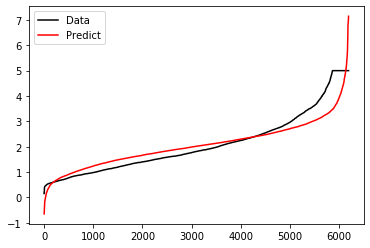

In [39]:
# 画图看是否拟合
import matplotlib.pyplot as plt

plt.plot(range(len(Ytest)), sorted(Ytest), c="black", label="Data")
plt.plot(range(len(yhat)),sorted(yhat), c="red", label="Predict")
plt.legend()
plt.show()

## 岭回归

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import train_test_split as TTS
import matplotlib.pyplot as plt

In [43]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [44]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3, random_state=420)

In [51]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [50]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [52]:
reg = Ridge(alpha=1).fit(Xtrain, Ytrain)

In [53]:
reg.score(Xtest, Ytest)

0.6043610352312278

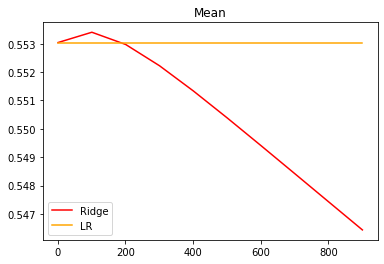

In [54]:
# 交叉验证下 两种回归的结果变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [],[]
for alpah in alpha_range:
    reg = Ridge(alpha=alpah)
    linear = LinearRegression()
    reg_score = cross_val_score(reg,X,y,cv=5,scoring="r2").mean()
    linear_score = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(reg_score)
    lr.append(linear_score)

plt.plot(alpha_range, ridge, color="red", label="Ridge")
plt.plot(alpha_range, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()

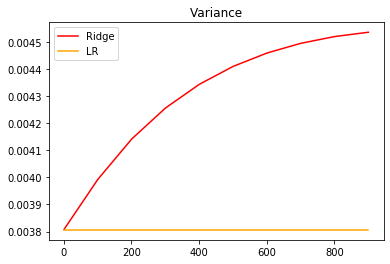

In [55]:
# 观察模型方差变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [],[]
for alpah in alpha_range:
    reg = Ridge(alpha=alpah)
    linear = LinearRegression()
    reg_score = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    linear_score = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    ridge.append(reg_score)
    lr.append(linear_score)

plt.plot(alpha_range, ridge, color="red", label="Ridge")
plt.plot(alpha_range, lr, color="orange", label="LR")
plt.title("Variance")
plt.legend()
plt.show()

### 波士顿房产数据集上的表现

In [56]:
from sklearn.datasets import load_boston

In [57]:
X = load_boston().data
y = load_boston().target

In [58]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3, random_state=420)

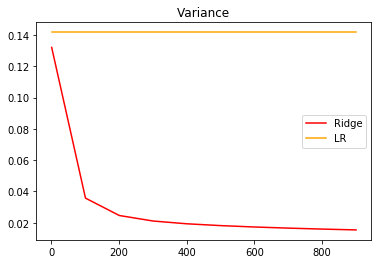

In [59]:
# 观察模型方差变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [],[]
for alpah in alpha_range:
    reg = Ridge(alpha=alpah)
    linear = LinearRegression()
    reg_score = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    linear_score = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    ridge.append(reg_score)
    lr.append(linear_score)

plt.plot(alpha_range, ridge, color="red", label="Ridge")
plt.plot(alpha_range, lr, color="orange", label="LR")
plt.title("Variance")
plt.legend()
plt.show()

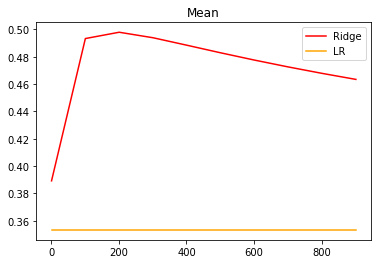

In [60]:
# R2变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [],[]
for alpah in alpha_range:
    reg = Ridge(alpha=alpah)
    linear = LinearRegression()
    reg_score = cross_val_score(reg,X,y,cv=5,scoring="r2").mean()
    linear_score = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(reg_score)
    lr.append(linear_score)

plt.plot(alpha_range, ridge, color="red", label="Ridge")
plt.plot(alpha_range, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()

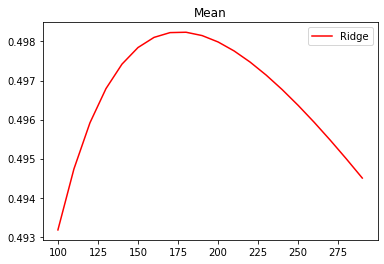

In [61]:
# 细化学习曲线
alpha_range = np.arange(100, 300, 10)
ridge, lr = [],[]
for alpah in alpha_range:
    reg = Ridge(alpha=alpah)
#     linear = LinearRegression()
    reg_score = cross_val_score(reg,X,y,cv=5,scoring="r2").mean()
#     linear_score = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(reg_score)
    lr.append(linear_score)

plt.plot(alpha_range, ridge, color="red", label="Ridge")
# plt.plot(alpha_range, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()

### 选取最佳正则化参数

In [62]:
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [68]:
from sklearn.linear_model import RidgeCV
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
#                ,scoring = "neg_mean_squared_error"
               ,store_cv_values = True
#                ,cv=5
              ).fit(X,y)

In [69]:
Ridge_.score(X, y)

0.6060251767338442

In [70]:
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [71]:
Ridge_.cv_values_.shape

(20640, 10)

In [73]:
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [74]:
Ridge_.alpha_

101

### Lasso的最佳正则化参数

In [76]:
from sklearn.linear_model import LassoCV

# 1.用自己设定了alpha
alpha_range = np.logspace(-10,-2,200,base=10)


In [77]:
lasso_ = LassoCV(alphas=alpha_range
                 ,cv=5
                ).fit(Xtrain, Ytrain)

In [78]:
lasso_.alpha_

1e-10

In [80]:
lasso_.mse_path_

array([[18.22359588, 38.85185051, 28.85187745, 16.40894218, 24.77808918],
       [18.20895348, 38.85405944, 28.8604976 , 16.41591579, 24.72763416],
       [18.19549324, 38.85595592, 28.86876632, 16.42268983, 24.68202952],
       [18.18396119, 38.85814873, 28.87690199, 16.42928913, 24.64095092],
       [18.173669  , 38.86053251, 28.8848168 , 16.43565785, 24.6039155 ],
       [18.16448788, 38.86302536, 28.89244607, 16.44175864, 24.57049626],
       [18.15628545, 38.86556357, 28.89974502, 16.44756181, 24.54031573],
       [18.14899461, 38.86809823, 28.9066847 , 16.45305441, 24.51305848],
       [18.14241847, 38.87059231, 28.91324852, 16.45822943, 24.48838831],
       [18.13651725, 38.8730184 , 28.91942955, 16.46308781, 24.4660622 ],
       [18.1312175 , 38.87535673, 28.92522824, 16.46763197, 24.44584544],
       [18.126723  , 38.87757736, 28.93067677, 16.47187093, 24.42752865],
       [18.12239793, 38.87970538, 28.93573092, 16.47581537, 24.41092482],
       [18.11851416, 38.88171805, 28.9

In [81]:
lasso_.coef_

array([-5.91360707e-02,  3.59005764e-02, -1.75848490e-02,  3.49991909e+00,
       -1.59154517e+01,  3.87516690e+00,  5.92507606e-03, -1.24195876e+00,
        3.20724778e-01, -1.38381096e-02, -9.18096656e-01,  1.19200101e-02,
       -5.13678354e-01])

In [82]:
# 2.用正则化路径
ls_ = LassoCV(eps=0.00001
              ,n_alphas=300
              ,cv=5
             ).fit(Xtrain, Ytrain)

In [83]:
ls_.alpha_

0.006817310862140507

In [84]:
ls_.mse_path_

array([[ 56.1389116 , 122.76551731,  93.16876846,  64.12177957,
         67.24330501],
       [ 55.01924621, 122.76551731,  93.16876846,  63.9025484 ,
         66.63082518],
       [ 53.99453702, 121.7201417 ,  92.08106043,  62.55861268,
         66.08524746],
       ...,
       [ 18.18110687,  38.85887783,  28.87935647,  16.43126034,
         24.62913854],
       [ 18.17681874,  38.85987112,  28.88264844,  16.43390889,
         24.61376443],
       [ 18.17273013,  38.86088664,  28.88589343,  16.43651219,
         24.59903489]])

In [85]:
ls_.coef_

array([-5.67663953e-02,  3.61112832e-02, -2.54036362e-02,  3.36569383e+00,
       -1.37028823e+01,  3.87997639e+00,  4.23190119e-03, -1.20712536e+00,
        3.16308940e-01, -1.41097868e-02, -8.95720362e-01,  1.19989342e-02,
       -5.17665833e-01])

### 决策树和线性模型

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [88]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)

In [89]:
y = np.sin(X) + rnd.normal(size=len(X)) / 3

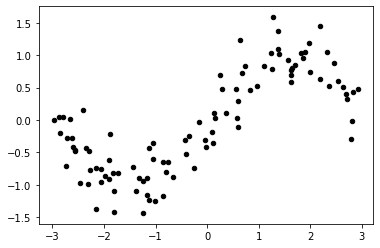

In [90]:
plt.scatter(X,y,marker='o',c='k',s=20)
plt.show()

In [91]:
X.shape

(100,)

In [93]:
X = X.reshape(-1,1)

In [94]:
# 建模
LinearR = LinearRegression().fit(X,y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X,y)

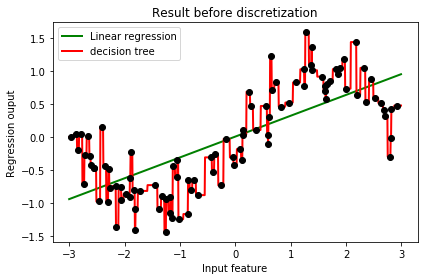

In [96]:
fig, ax1 = plt.subplots(1)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
ax1.plot(line,LinearR.predict(line),linewidth=2,color="green",label="Linear regression")
ax1.plot(line,TreeR.predict(line),linewidth=2,color='red',label="decision tree")
ax1.plot(X[:,0], y,'o',c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression ouput")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

### 使用分箱进行建模和绘图

In [104]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

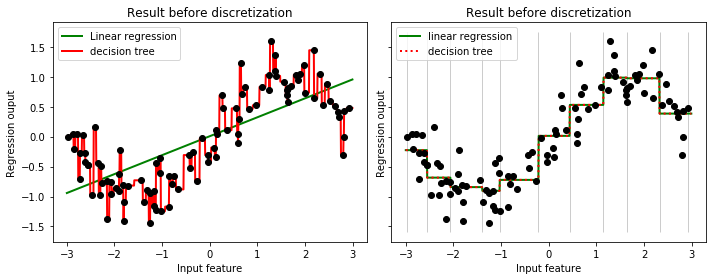

In [105]:
fig, (ax1,ax2) = plt.subplots(ncols=2
                             , sharey=True
                             , figsize=(10,4)
                             )

# 在图一上画原始数据的建模结果
ax1.plot(line,LinearR.predict(line),linewidth=2,color="green",label="Linear regression")
ax1.plot(line,TreeR.predict(line),linewidth=2,color='red',label="decision tree")
ax1.plot(X[:,0], y,'o',c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression ouput")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# 使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line
         , LinearR_.predict(line_binned)
         , linewidth=2
         , color="green"
         , linestyle='-'
         , label="linear regression"
        )
ax2.plot(line
         , TreeR_.predict(line_binned)
         , linewidth=2
         , color='red'
         , linestyle=":"
         , label="decision tree"
        )
ax2.vlines(enc.bin_edges_[0]
           , *plt.gca().get_ylim()
           , linewidth=1
           , alpha=0.2
          )
# 画出原始数据
ax2.plot(X[:,0], y, 'o', c='k')

ax2.legend(loc="best")
ax2.set_ylabel("Regression ouput")
ax2.set_xlabel("Input feature")
ax2.set_title("Result before discretization")

plt.tight_layout()
plt.show()

### 如何选取最优的箱数

In [106]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

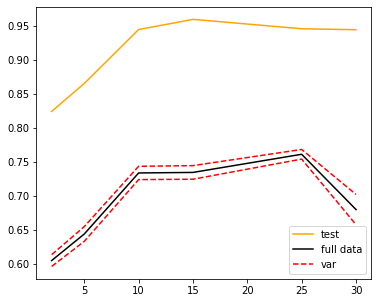

In [107]:
pred, score, var = [],[],[]
bind_range = [2,5,10,15,25,30]
for i in bind_range:
    enc = KBinsDiscretizer(n_bins=i, encode="onehot")
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    LinearR_ = LinearRegression()
    cvresult = CVS(LinearR_, X_binned, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    pred.append(LinearR_.fit(X_binned, y).score(line_binned, np.sin(line)))
    
plt.figure(figsize=(6,5))
plt.plot(bind_range, pred,c="orange", label="test")
plt.plot(bind_range, score, c="k", label="full data")
plt.plot(bind_range, score+np.array(var)*0.5, c='red',linestyle="--",label="var")
plt.plot(bind_range, score-np.array(var)*0.5, c="red", linestyle="--")
plt.legend()
plt.show()

### 多项式回归处理非线性问题

In [109]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [111]:
d = 5
LinearR = LinearRegression().fit(X,y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_,y)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line_ = PF(degree=d).fit_transform(line)

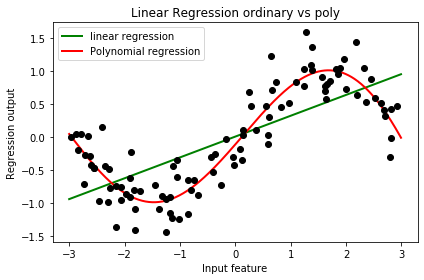

In [113]:
fig, ax1 = plt.subplots(1)
ax1.plot(line
         , LinearR.predict(line)
         , linewidth=2
         , color="green"
         , label="linear regression"
        )
ax1.plot(line
         , LinearR_.predict(line_)
         , linewidth=2
         , color='red'
         , label="Polynomial regression"
        )
ax1.plot(X[:, 0], y, 'o', c='k')

ax1.legend()
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

### 多项式回归的可解释性

In [133]:
from sklearn.datasets import fetch_california_housing as fch

In [134]:
house_value = fch()

In [135]:
X = pd.DataFrame(house_value.data)
y = pd.DataFrame(house_value.target)

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [136]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [137]:
poly = PF(degree=2).fit(X,y)

In [138]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [139]:
X_ = poly.transform(X)

reg = LinearRegression().fit(X_,y)
coef = reg.coef_

In [140]:
coef

array([[ 5.91954671e-08, -1.12430254e+01, -8.48898545e-01,
         6.44105921e+00, -3.15913298e+01,  4.06090654e-04,
         1.00386233e+00,  8.70568190e+00,  5.88063273e+00,
        -3.13081227e-02,  1.85994642e-03,  4.33020374e-02,
        -1.86142273e-01,  5.72831387e-05, -2.59019459e-03,
        -1.52505718e-01, -1.44242943e-01,  2.11725356e-04,
        -1.26218987e-03,  1.06115042e-02,  2.81885267e-06,
        -1.81716949e-03, -1.00690373e-02, -9.99950174e-03,
         7.26947771e-03, -6.89064378e-02, -6.82365623e-05,
         2.68878839e-02,  8.75089926e-02,  8.22890375e-02,
         1.60180956e-01,  5.14263993e-04, -8.71911382e-02,
        -4.37043021e-01, -4.04150597e-01,  2.73779232e-09,
         1.91426759e-05,  2.29529762e-05,  1.46567730e-05,
         8.71560983e-05,  2.13344592e-02,  1.62412938e-02,
         6.18867357e-02,  1.08107173e-01,  3.99077352e-02]])

In [147]:
coeff_ = pd.DataFrame([poly.get_feature_names(X.columns), coef.tolist()]).T

In [148]:
coeff_.head()

,0,1
0,1,"[5.91954671367121e-08, -11.243025421337789, -0..."
1,住户收入中位数,None
2,房屋使用年代中位数,None
3,平均房间数目,None
4,平均卧室数目,None


In [143]:
coeff_.columns = ["feature", "co"]

In [146]:
coeff_.head()

,feature,coef
0,1,"[5.91954671367121e-08, -11.243025421337789, -0..."
1,住户收入中位数,None
2,房屋使用年代中位数,None
3,平均房间数目,None
4,平均卧室数目,None


In [154]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()[0]]).T
coeff.columns = ["feature","coef"]

In [155]:
coeff.head()

,feature,coef
0,1,5.91955e-08
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
3,平均房间数目,6.44106
4,平均卧室数目,-31.5913


In [156]:
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064
